# Incorrectly labeled dataset

Obviously, there is **no easy way to solve your problem** - after all, why build a classifier if you already have a system that can detect wrong classifications.

Do you know **how much the erroneous classifications affect your learning?** If there are only a small percentage of them, they should not hurt the performance much. (Edit. Ah, apparently you don't. Anyway, I suggest you try it out - at least if you can identify a false result when you see one.)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from sklearn.model_selection import train_test_split
import warnings

In [3]:
df = pd.read_csv("intent.csv")
df.head()

,motivos,crec,cred,equ,inic,inv,mkt,no,renta,sueldo,temp
0,Crear un departamento de ventas e inversión a ...,0,0,0,0,0,1,0,0,0,0.0
1,establecerme en un local y agregar materia pri...,0,0,0,0,1,0,0,1,0,0.0
2,Compra de equipo e incrementar inventario,0,0,1,0,1,0,0,0,0,0.0
3,Invertir en crecimiento de flotilla de unidade...,0,0,1,0,0,0,0,0,0,0.0
4,Para comprar mercancía y comprar lonas nuevas,0,0,0,0,1,0,0,0,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6679 entries, 0 to 6678
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   motivos  6679 non-null   object 
 1   crec     6679 non-null   int64  
 2   cred     6679 non-null   int64  
 3   equ      6679 non-null   int64  
 4   inic     6679 non-null   int64  
 5   inv      6679 non-null   int64  
 6   mkt      6679 non-null   int64  
 7   no       6679 non-null   int64  
 8   renta    6679 non-null   int64  
 9   sueldo   6679 non-null   int64  
 10  temp     6673 non-null   float64
dtypes: float64(1), int64(9), object(1)
memory usage: 574.1+ KB


Variable `temp` should be int, but was cast as float. This possibly indicates data entry errors.

Print unique values (should be 0, 1 for all variables):

In [5]:
for i in df.columns[1:]:
    print('Unique values of column:', i)
    print(df[i].value_counts())
    print()

Unique values of column: crec
0    6079
1     600
Name: crec, dtype: int64

Unique values of column: cred
0    6250
1     429
Name: cred, dtype: int64

Unique values of column: equ
0    4699
1    1980
Name: equ, dtype: int64

Unique values of column: inic
0    6298
1     381
Name: inic, dtype: int64

Unique values of column: inv
0    4361
1    2318
Name: inv, dtype: int64

Unique values of column: mkt
0    6350
1     329
Name: mkt, dtype: int64

Unique values of column: no
0    6235
1     444
Name: no, dtype: int64

Unique values of column: renta
0    5909
1     770
Name: renta, dtype: int64

Unique values of column: sueldo
0    6464
1     215
Name: sueldo, dtype: int64

Unique values of column: temp
0.0    6484
1.0     189
Name: temp, dtype: int64



There are no decimal values on variable `temp`, so will convert to int:

In [6]:
# df = df.astype({"temp":'int'}) 
# df.info()

Dice que tiene NA o inf, pero en la distribución y en los unique values no aparecen (?)

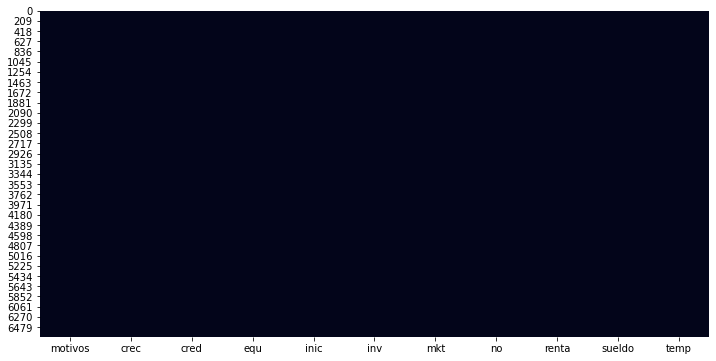

In [7]:
# Visualize missings pattern of the dataframe
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [8]:
# counting infinity in a particular column name
c = np.isinf(df['temp']).values.sum()
print("It contains " + str(c) + " infinite values")

It contains 0 infinite values


In [9]:
df.isna().sum()

motivos    0
crec       0
cred       0
equ        0
inic       0
inv        0
mkt        0
no         0
renta      0
sueldo     0
temp       6
dtype: int64

In [10]:
df[df.isna().any(axis=1)]

,motivos,crec,cred,equ,inic,inv,mkt,no,renta,sueldo,temp
628,CAPITAL DE TRABAJO COMPRA DE MATERIA Y MANO DE...,0,0,0,1,0,0,0,1,0,NaN
710,Para incrementar ventas tener inventarios,0,0,0,1,0,0,0,0,0,NaN
1130,"Capital de trabajo\n,0,0,0,0,0,0,0,1,0,0\nRe i...",0,0,0,0,0,0,0,0,0,NaN
1437,Tengo que hacer renovación de Consepción,0,0,0,0,0,1,0,0,0,NaN
1699,PARA LA COMPRA DE ACTIVOS FIJOS PARA LA EMPRESA,0,0,0,1,0,0,0,0,0,NaN
2263,Compra de equipos de cómputo para lanzar proye...,0,1,0,0,0,0,0,0,0,NaN


We could drop the rows. But since most rows have other labels besides `temp`, it would be preferrable to keep them. So we will impute the NaNs with the median, which will be 0:

In [11]:
df['temp'].fillna(df['temp'].median(), inplace=True)
df.isna().sum()

motivos    0
crec       0
cred       0
equ        0
inic       0
inv        0
mkt        0
no         0
renta      0
sueldo     0
temp       0
dtype: int64

Now we can convert `temp` to int:

In [12]:
df = df.astype({"temp":'int'}) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6679 entries, 0 to 6678
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   motivos  6679 non-null   object
 1   crec     6679 non-null   int64 
 2   cred     6679 non-null   int64 
 3   equ      6679 non-null   int64 
 4   inic     6679 non-null   int64 
 5   inv      6679 non-null   int64 
 6   mkt      6679 non-null   int64 
 7   no       6679 non-null   int64 
 8   renta    6679 non-null   int64 
 9   sueldo   6679 non-null   int64 
 10  temp     6679 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 574.1+ KB


We want to see if the dataset is balanced:

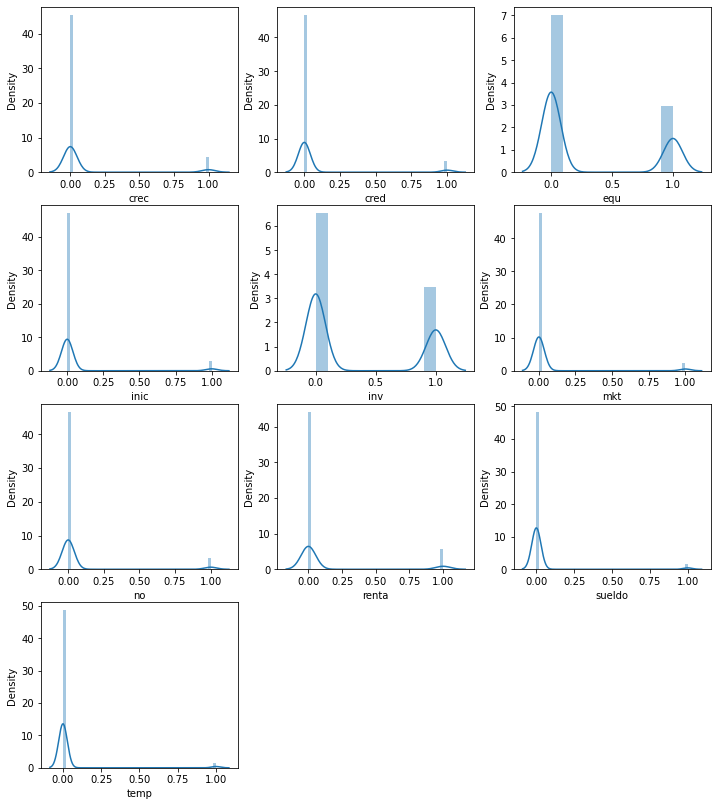

In [13]:
warnings.simplefilter(action='ignore', category=FutureWarning)

n_rows = 4
n_cols = 3

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12,14))

for i, column in enumerate(df.drop(['motivos'], axis=1).columns):
    sns.distplot(df.drop(['motivos'], axis=1)[column],ax=axes[i//n_cols,i%n_cols])
    
fig.delaxes(axes[3,2])
fig.delaxes(axes[3,1])

As expected, all classes are very imbalanced, with 1 being the minority class.

# Armar un primer modelo, aunque ande mal

### Towards Data Science (Susan Li):

The problem is supervised text classification problem, and our goal is to investigate which supervised machine learning methods are best suited to solve it

The classifier makes the assumption that each new complaint is assigned to **one and only one category**.

Add a column encoding the product as an integer because categorical variables are often better represented by integers than strings (hacer **one-hot encoding** de las categorías)

Al mirar el balance, el tipo se fija en las **categorías entre sí**:

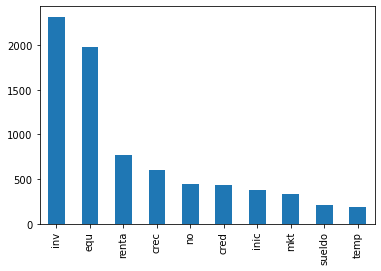

In [14]:
# pd.options.plotting.backend = 'plotly'
# import pandas as pd

df.drop(['motivos'], axis=1).sum().sort_values(ascending=False).plot.bar(ylim=0)
plt.show()

However, in our case of learning imbalanced data, the majority classes might be of our great interest. It is desirable to have a classifier that gives high prediction accuracy over the majority class, while maintaining reasonable accuracy for the minority classes. Therefore, we will leave it as it is (hay que **estar atento a esta hipótesis**)

## Text representation
One common approach for extracting features from text is to use the bag of words model: a model where for each document, a complaint narrative in our case, the presence (and often the frequency) of words is taken into consideration, but the order in which they occur is ignored.

Esto sirve porque **los textos son cortitos**.

### Preparation

Trato de crear la columna product (en una versión final **tendría que evitarlo** porque es hacer lo contrario a one hot encoding)

In [15]:
df.drop(['motivos'], axis=1).idxmax(axis=1)

0        mkt
1        inv
2        equ
3        equ
4        inv
        ... 
6674      no
6675    inic
6676     inv
6677     inv
6678    inic
Length: 6679, dtype: object

Creo una columna `category` con los labels. Ojo que acá estoy **quedándome sólo con 1 label** (lo permito por ahora, para tener un modelo andando)

También hace falta una variable `category_id`:

In [16]:
df['category'] = df.drop(['motivos'], axis=1).idxmax(axis=1)
df['category_id'] = df['category'].factorize()[0]
df.head()

,motivos,crec,cred,equ,inic,inv,mkt,no,renta,sueldo,temp,category,category_id
0,Crear un departamento de ventas e inversión a ...,0,0,0,0,0,1,0,0,0,0,mkt,0
1,establecerme en un local y agregar materia pri...,0,0,0,0,1,0,0,1,0,0,inv,1
2,Compra de equipo e incrementar inventario,0,0,1,0,1,0,0,0,0,0,equ,2
3,Invertir en crecimiento de flotilla de unidade...,0,0,1,0,0,0,0,0,0,0,equ,2
4,Para comprar mercancía y comprar lonas nuevas,0,0,0,0,1,0,0,0,0,0,inv,1


In [17]:
# from io import StringIO

# col = ['category', 'motivos']

# df = df[col]
# df = df[pd.notnull(df['motivos'])]
# df.columns = ['category', 'motivos']
# df['category_id'] = df['category'].factorize()[0]
# df.head()

category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

In [18]:
# from nltk.corpus import stopwords
# stopwords.words('english')

# import nltk
# nltk.download('stopwords')

In [19]:
from nltk.corpus import stopwords
stop_words = stopwords.words('spanish')

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=stop_words)

features = tfidf.fit_transform(df.motivos).toarray()
labels = df.category_id
features.shape

(6679, 2249)

We can use sklearn.feature_selection.chi2 to find the terms that are the most correlated with each of the categories:

In [21]:
from sklearn.feature_selection import chi2

N = 2

for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'crec':
  . Most correlated unigrams:
. abrir
. sucursal
  . Most correlated bigrams:
. abrir sucursal
. nueva sucursal
# 'cred':
  . Most correlated unigrams:
. pagar
. deudas
  . Most correlated bigrams:
. pago deudas
. pagar deudas
# 'equ':
  . Most correlated unigrams:
. maquinaria
. equipo
  . Most correlated bigrams:
. comprar equipo
. compra equipo
# 'inic':
  . Most correlated unigrams:
. iniciar
. poner
  . Most correlated bigrams:
. iniciar negocio
. poner negocio
# 'inv':
  . Most correlated unigrams:
. inventario
. mercancía
  . Most correlated bigrams:
. compra materia
. materia prima
# 'mkt':
  . Most correlated unigrams:
. marketing
. publicidad
  . Most correlated bigrams:
. invertir publicidad
. publicidad negocio
# 'no':
  . Most correlated unigrams:
. estudios
. casa
  . Most correlated bigrams:
. construccion casa
. remodelar casa
# 'renta':
  . Most correlated unigrams:
. oficina
. mobiliario
  . Most correlated bigrams:
. local comercial
. comprar mobiliario
# '

# Training the classifiers
## Naive Bayes

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# X_train, X_test, y_train, y_test = train_test_split(df['motivos'], df['category'], random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(df['motivos'], df['category'], random_state = 0, stratify=df['category'])

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

Check some predictions:

In [23]:
print(clf.predict(count_vect.transform(["Mi negocio se encuentra en el sector educativo. Queremos abrir otra sede de manera formal en la CDMX"])))

['equ']


inic would have been a better fit

In [24]:
print(clf.predict(count_vect.transform(["Ampliaciin de negocio para rentar mas.habitaciones"])))

['inv']


crec would be better

## Comparing several models:
### No está bien quedarse con el mejor en esta instancia
An algorithm may not perform well right out of the box but will with the **right hyperparameters**.

In [37]:
import warnings
warnings.simplefilter("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial'),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

for model in models:
    model_name = model.__class__.__name__
    scores = cross_validate(model, features, labels, scoring=scoring,
                         cv=CV, return_train_score=True)
    for i in range(CV):
        entries.append((model_name, i, scores['test_accuracy'][i], scores['test_precision_macro'][i], scores['test_recall_macro'][i], scores['test_f1_macro'][i]))
        
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy', 'precision', 'recall', 'F1 score'])

Ojo que cross_validate **ya trabaja con stratify**

In [35]:
cv_df.drop(['fold_idx'], axis=1).groupby('model_name').mean()

,accuracy,precision,recall,F1 score
model_name,,,,
LinearSVC,0.690528,0.609390,0.547588,0.569260
LogisticRegression,0.693522,0.647480,0.481269,0.518332
MultinomialNB,0.612672,0.598076,0.338069,0.370119
RandomForestClassifier,0.460400,0.119214,0.153994,0.120986


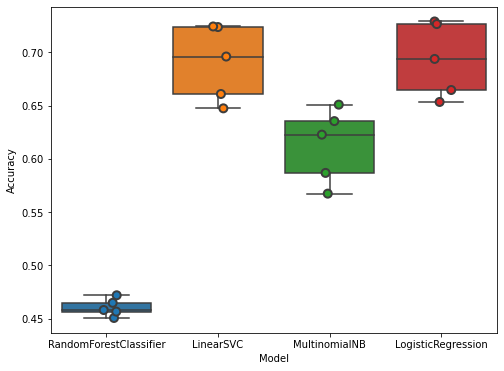

In [83]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

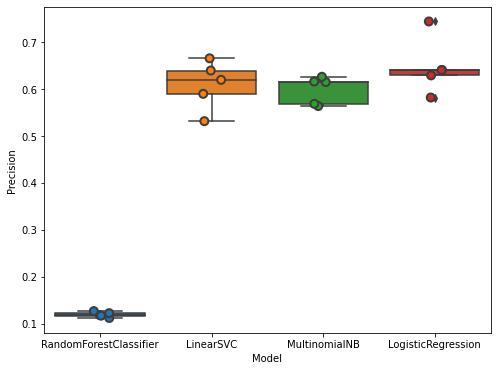

In [84]:
plt.figure(figsize=(8,6))
sns.boxplot(x='model_name', y='precision', data=cv_df)
sns.stripplot(x='model_name', y='precision', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xlabel('Model')
plt.ylabel('Precision')
plt.show()

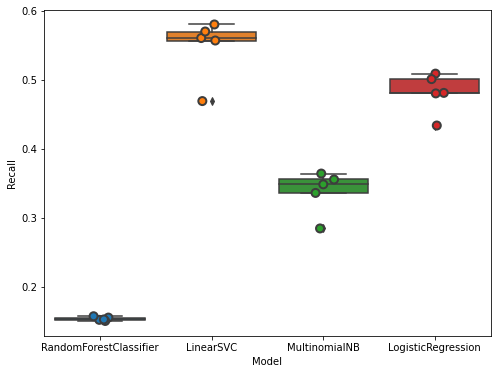

In [85]:
plt.figure(figsize=(8,6))
sns.boxplot(x='model_name', y='recall', data=cv_df)
sns.stripplot(x='model_name', y='recall', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xlabel('Model')
plt.ylabel('Recall')
plt.show()

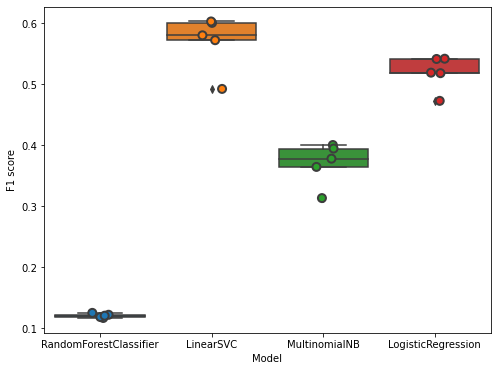

In [86]:
plt.figure(figsize=(8,6))
sns.boxplot(x='model_name', y='F1 score', data=cv_df)
sns.stripplot(x='model_name', y='F1 score', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xlabel('Model')
plt.ylabel('F1 score')
plt.show()

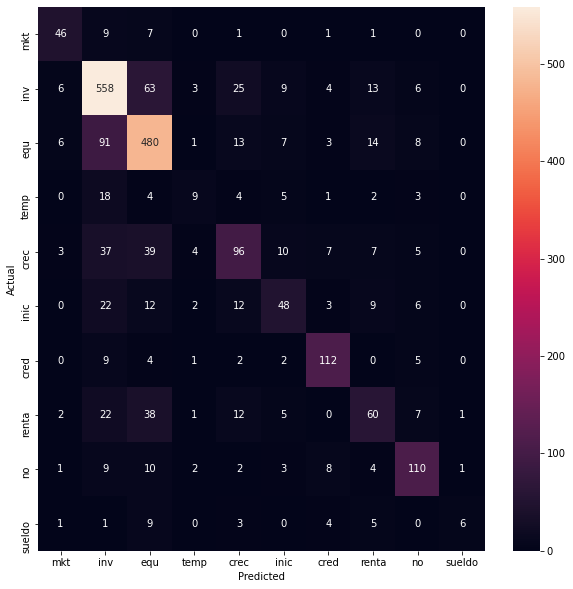

In [96]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [97]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred, target_names=df['category'].unique()))

              precision    recall  f1-score   support

         mkt       0.71      0.71      0.71        65
         inv       0.72      0.81      0.76       687
         equ       0.72      0.77      0.74       623
        temp       0.39      0.20      0.26        46
        crec       0.56      0.46      0.51       208
        inic       0.54      0.42      0.47       114
        cred       0.78      0.83      0.81       135
       renta       0.52      0.41      0.46       148
          no       0.73      0.73      0.73       150
      sueldo       0.75      0.21      0.32        29

    accuracy                           0.69      2205
   macro avg       0.64      0.55      0.58      2205
weighted avg       0.68      0.69      0.68      2205



### Investigate misclassifications:

In [98]:
from IPython.display import display

for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 10:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
            display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['category', 'motivos']])
            print('')

'equ' predicted as 'inv' : 91 examples.


,category,motivos
444,equ,invirtiendo el dinero en la adquisición de equ...
651,equ,inversion en equipo y material para reestablec...
2643,equ,"Compra de insumos para proyecto, materiales y ..."
2858,equ,PARA COMPRAR MÁS MATERIA PRIMA Y PODER SURTIR ...
2753,equ,Para compra de material e infraestructura
...,...,...
1005,equ,Comprar más mercancía y mobiliario para el local
1114,equ,para compra de mercancia asi como de materia p...
4832,equ,comprar soldadora de microalambre que me ayuda...
2401,equ,Lo necesito para hacer mas gallineros ya k me ...



'temp' predicted as 'inv' : 18 examples.


,category,motivos
5453,temp,"Vendo bolsa con publicidad impresa,mando fabri..."
206,temp,Adquisición de mercancias para la temporada de...
2384,temp,COMPRA DE PRODUCTO DE OPORTUNIDAD CON EL CUAL ...
1238,temp,MERCANCIA YA QUE VIENE LA TEMPORARDA DE VINOS ...
6,temp,Inversión en mercancía para temporada de alta ...
5480,temp,Me dedico a la distribución de artículos de pa...
751,temp,aumentar inventario debido a la temporada alta
1246,temp,COMPRA DE MERCANCIA A BAJO COSTO Y DE TEMPORAD...
2846,temp,PARA COMPRAR MAS INVENTARIO PARA NAVIDAD YA QU...
6065,temp,AVECES EL CLIENTE NO NOS DA EL 50 % DE ANTICIP...



'crec' predicted as 'inv' : 37 examples.


,category,motivos
3571,crec,registro de marca y etiquetado para una mejor ...
5588,crec,al incrementar el capital de mi negocio se ele...
1595,crec,Para mejorar y hacer crecer mi empresa él iny...
2229,crec,Para capitalizarlo y llegar a mas lugares ya q...
1705,crec,capital de trabajo para inversion en mis opera...
1712,crec,El prestamo seria para invertirlo en mi negoci...
558,crec,"Inversión para Potencializar un mercado, apoyo..."
1926,crec,Para compra de mercancia e impulsar y desarrol...
5705,crec,tengo 7 años con un taller de carpinteria y me...
530,crec,Capital de Trabajo para desarrollo de nuevos p...



'inic' predicted as 'inv' : 22 examples.


,category,motivos
6406,inic,invertir en la venta de comida los domingos
3779,inic,ESTABA EN ASOCIACION CON FAMILIARES PERO AHORA...
6035,inic,En una tienda de servicio de ropa lociones
1551,inic,Quiero emprender una tortillería para lo cual ...
2868,inic,Requiero el crédito para utilizarlo de Inversi...
39,inic,Mi proyecto es comprar Productos Desechables B...
4713,inic,En venta de hamburguesa y hot dogs y en mi.ti...
4957,inic,Estoy iniciando un negocio de venta por catalo...
1633,inic,Inversión para ofrecer trabajos de mantenimien...
5613,inic,mi negocio se dedica actualmente a la venta de...



'renta' predicted as 'inv' : 22 examples.


,category,motivos
6633,renta,intalaciones y mejoras de mi establecimiento
3955,renta,hola la verdad es que nos robaron mi carro con...
6653,renta,mejorar el restaurante para poder atender mejo...
1965,renta,Contruccion de un local para hacer crecer el a...
2626,renta,INVERSION PARA RENTA DE LOCAL E INVENTARIO.\nP...
2600,renta,Remodelación y actualización de activos fijos
3524,renta,EN REMODELACION Y CREACION DE UN SHOOWROOM PAR...
2525,renta,Quiero invertir en un departamento para airbnb...
467,renta,ADQUISICION DE INMOBILIARIO MATERIA PRIMA
3545,renta,remodelar y poder generar mayores ventas y asi...



'inv' predicted as 'equ' : 63 examples.


,category,motivos
4446,inv,En construcción de casas para venderlas y hace...
5443,inv,Pago a proveedor para producción de impresión.
6152,inv,para surtir de insumos y material para una pla...
4750,inv,"Stock de material, herramientas, todo lo relac..."
4434,inv,NECESIDAD DE INVERTIR EN PRODUCTO PARA UNA DIS...
...,...,...
3194,inv,Tengo una parte.de.los.accesorios.pero.necesit...
4129,inv,"Compra de maquinaria, materia prima e insumos"
95,inv,COMPRA DE MERCANCÍADE LABORATORIO Y CURACIÓN
2111,inv,COMPRA DE INVENTARIO DE EQUIPOS DE SEGURIDAD E...



'crec' predicted as 'equ' : 39 examples.


,category,motivos
1095,crec,INVERTIR EN MI NEGOCIO OFRECIENDO MAS SERVICIO...
154,crec,Quiero ampliar mi negocio y quiero comprar equipo
3060,crec,capital de trabajo aplicado en la adquisición ...
2017,crec,Lo destinare par capital de trabajo gastos de ...
1281,crec,EQUIPAMIENTO DE OTRA SUCURSAL COMO EQUIPOS MAT...
1710,crec,"En equipo, material y capital de trabajo para ..."
695,crec,"Capital de trabajo, compra de equipo necesario..."
4098,crec,"Operación de una unidad nueva, para el servici..."
861,crec,Renovación y estructura para tianguis de autos
12,crec,En tan solo 4 meses ya estamos por facturar 40...



'inic' predicted as 'equ' : 12 examples.


,category,motivos
5602,inic,Bienes raices. Comprar peppedades de alquiler...
2805,inic,Para crear una empresa de software mi equipo d...
2629,inic,para la adquisición de un permiso de generació...
5972,inic,Hola buenas tardes. mi hija y yo vamos a poner...
283,inic,Lo usaré para comprar todo el material requeri...
30,inic,Rentare un espacio y pondré equipos básicos de...
3074,inic,El crédito será utilizado para realizar trámit...
5378,inic,es para comprar mas cosas para un pequño negoc...
6206,inic,"Tengo un local de Plasticos y desechables, fun..."
4739,inic,Quisiera tener el prestámo para pagar un lugar...



'renta' predicted as 'equ' : 38 examples.


,category,motivos
5583,renta,"Tengo un restauransito, es sólo que he trabaja..."
4618,renta,Para remo delación de mi negocio para comprar ...
4059,renta,"Remodelación y ampliación del negocio, así com..."
1160,renta,Para remodelacion de oficina y equipo mobiliario
202,renta,RENOVACION DEL EQUIPO TECNOLÍGICO REMODELACIÓN...
834,renta,Para compra de mobiliario equipo remodelación ...
1370,renta,remodelación de la oficina y adquirir equipo d...
1748,renta,Para modernizar las instalaciones ya que hoy e...
2857,renta,INVERTIR EN MI NEGOCIO DE ALIMENTOS PRINCIPALM...
4001,renta,"Equipo de computo, oficina, fotografía y video"



'no' predicted as 'equ' : 10 examples.


,category,motivos
2920,no,Quiero usar el credito para una operacion
4659,no,infraestructura tecnológica para que los estud...
5832,no,compra de camion volteo o una retroexcavadora
5230,no,Fallas mecanicas de mi carro y no cuento con e...
3508,no,"Soy profesor de Música, con especialidad en sa..."
6039,no,se me descompuso un refrigerador y necesito co...
2443,no,Comprar un vehiculo para poder transportarme p...
3255,no,compra de autos para la reventa de los mismos
4266,no,"se descompuso la transmision de mi carro, me c..."
1197,no,Requiero dinero para continuar laborando. Capi...



'inv' predicted as 'crec' : 25 examples.


,category,motivos
5151,inv,COMPRAR PARA REVENDER A MIS CLIENTES ACTUALES ...
1457,inv,Compra de juguetes coleccionables para posicio...
6175,inv,PARA INVERSION DE MI NEGOCIO EN INSUMOS MAQUIN...
3914,inv,Mi negocio esta crciendo pero por el momento n...
2542,inv,abastecer el negocio con lo indispensable
1702,inv,Fertilizantes Agricolas y un nuevo local
2640,inv,Para inversión de mi negocio de impresiones ...
5199,inv,Infraestructura y aumentar el inventario
3535,inv,Pago a provedores y capital de trabajo para pr...
1736,inv,Capital de trabajo para dos proyectos que teng...



'equ' predicted as 'crec' : 13 examples.


,category,motivos
6225,equ,"Crecer la red de telecomunicaciones, equipamie..."
5683,equ,Capital de trabajo y expansión de área comercial
5666,equ,Para hacer crecer mi negocio mediante la adqui...
2529,equ,en invertir en tecnología para mi negocio
5450,equ,Quiero surtir mas mi negocio ya que tengo un a...
2475,equ,capital de trabajo que apoye el crecimiento y ...
5743,equ,Necesitó comprar equipo de cómputo para la efi...
2616,equ,Ampliar y ofrecer mis servicios a más empresas...
5726,equ,Estamos iniciando operaciones en una sucursal ...
5902,equ,Adquisición de equipo de transporte para el in...



'inic' predicted as 'crec' : 12 examples.


,category,motivos
1414,inic,Compra en instalación puesta en marcha iniciac...
3605,inic,es un restaurante en una zona de oficina donde...
2584,inic,Para hacer trámites para ponerle nombre a i ne...
1422,inic,para invertir en un negocio de pastelera
5459,inic,EN PROYECTOS FUTUROS QUE SE ESTA NEGOCIANDO C...
4041,inic,"Impulsar mi negocio, ya que estuvo detenido po..."
3645,inic,"Emprendiemiento Empresarial, para la creacion ..."
5633,inic,Para invertir en un negocio y hacer crecer mi ...
3043,inic,Pienso invertirlo en crear una red de rosticer...
5325,inic,En un negocio familiar para hacerlo crecer y d...



'renta' predicted as 'crec' : 12 examples.


,category,motivos
502,renta,Somos un restaurante en Guadalajara con 8 años...
311,renta,En la creación de otro taller para poder expandir
4751,renta,"Mejoras de mi negocio, ya que tiene mucha proy..."
1282,renta,Expander y traer nuevas tecnologias para poner...
2621,renta,En la compra de productos y muebles para poner...
1848,renta,PARA AMPLIAR EL TALLER DONDE SE ESTA TRABAJANDO
608,renta,Ampliación de instalaciones por crecimiento de...
5139,renta,acabo de abrir un pequeño restaurante y necesi...
3804,renta,En la compra de mobiliario y equipo para abrir...
402,renta,Se usará para la apertura de una nueva sucursal.



'crec' predicted as 'inic' : 10 examples.


,category,motivos
98,crec,El préstamo lo utilizaría para hacer crecer el...
2828,crec,Abrir un 2da restaurante en la ciudad Chihuahu...
629,crec,Tengo ya iniciada una lavandería le invertí al...
227,crec,Inversión en expansión de negocio a otros merc...
979,crec,quiero desarrollar un nuevo tour de buceo
2559,crec,Mi credito lo quiero para ser una persona inde...
3200,crec,"capital de trabajo, ya que al iniciar nuevos p..."
5788,crec,ME GUSTARÍA PONER OTRA UNIDAD DE VENTA DE DESA...
18,crec,Mi negocio se encuentra en el sector educativo...
1691,crec,Invertir en el negocio para poder seguir creci...



'inv' predicted as 'renta' : 13 examples.


,category,motivos
5760,inv,"compra de mercancia, un punto de venta remodel..."
2081,inv,Compra de material y renta de bodega para abri...
1940,inv,Para la compra de mobiliario y materia prima
4445,inv,"EXPASION DE MI NEGOCIO, YA QUE ME ESTAN DANDO ..."
244,inv,Mi tienda es de productos de computo en linea ...
1136,inv,para inversion de mercancia y crecimiento en e...
2630,inv,Para inversión en adecuaciones de mi local y c...
3528,inv,"Compra de materiales, ademas de remodelar el e..."
2569,inv,Para invertir en mi negoció en compras que se ...
3379,inv,para insumo y remodelación y así al cansar mas...



'equ' predicted as 'renta' : 14 examples.


,category,motivos
543,equ,Cambio de domicilio para mayor comodidad de cl...
5548,equ,equiparé el local para poder incrementar la pr...
4381,equ,"renovar inmuebles,mediante acondicionamiento i..."
4278,equ,invertir en muebleria para las instalaciones p...
1526,equ,Para comprar una parrilla mas amplia unas 2 me...
2768,equ,construcion de local propio y mobiliario y her...
147,equ,"Equipo de computo, mobiliario y oficinas."
1563,equ,Compra de mobiliario electrónicos computo
282,equ,"mejora de instalaciones, mantenimiento general..."
6196,equ,lo requiero para completar la compra de un ter...


La fila 444 venía etiquetada como equ, y el modelo la clasificó como inv. Pero en realidad el texto habla de ambos.

En este caso, aún que yo pudiera hacer que mi algoritmo clasifique en más de una categoría, eso no lo voy a poder ver como una mejora en el performance, porque el etiquetado original no tiene la calidad suficiente.

Las 653, 2645 fueron clasificadas como inv. Pero en el dataset tienen ambos labels, lo que pasa es que yo tiré uno. **Cómo puedo solucionar eso?**

### Sobre qué corre esto?

Quizás sea sobre las predicciones.

In [100]:
model.fit(features, labels)
N = 2

for category, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(category))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'crec':
  . Top unigrams:
       . sucursal
       . sucursales
  . Top bigrams:
       . negocio productos
       . necesito prestamo
# 'cred':
  . Top unigrams:
       . deudas
       . deuda
  . Top bigrams:
       . pago deudas
       . pagar creditos
# 'equ':
  . Top unigrams:
       . equipo
       . maquinaria
  . Top bigrams:
       . compra equipamiento
       . credito necesito
# 'inic':
  . Top unigrams:
       . inicial
       . poner
  . Top bigrams:
       . emprender negocio
       . nuevo negocio
# 'inv':
  . Top unigrams:
       . inventario
       . mercancía
  . Top bigrams:
       . mercancía publicidad
       . adquisición insumos
# 'mkt':
  . Top unigrams:
       . publicidad
       . marketing
  . Top bigrams:
       . trabajo compra
       . invertir publicidad
# 'no':
  . Top unigrams:
       . casa
       . vivienda
  . Top bigrams:
       . invertir proyecto
       . utiles escolares
# 'renta':
  . Top unigrams:
       . mobiliario
       . remodelar
  . To

# Qué mejorar en este proyecto
- convergencia de la logística
    - Even though we removed stop words and are applying thresholds to the tf-idf vectorizer, it still leaves us with a lot of unique words (~15K), many of which we probably don’t need and are redundant. So, let’s also do Latent Semantic Analysis (LSA) which is a dimensionality reduction technique. LSA uses SVD or Singular Value Decomposition (and in particular Truncated SVD) to reduce the number of dimensions and select the best ones.
- Hyperparameter tuning
    - I’ll use sklearn’s gridsearch with k-fold cross-validation for that (Andrew decía que grid search no convenía)
- comparar con hemming loss y sentence level representations
- cuál sería la mejor métrica de performance?
    - Usually when the class distribution is unbalanced (like we have here), accuracy is considered a poor choice as it gives high scores to models which just predict the most frequent class so **F1 score is a better choice** in our case.
    
    For multiclass classification you also need to select the **type of averaging** for these metrics as they are **calculated per class**. The discussion of what’s best and what you should use depends on your situation and is beyond the scope of this article but in general I find macro averaging the most useful (which is what I’m using here). It computes F1 scores for each class and returns the average of those scores. Remember though, the real test is how they perform on unseen articles.
    - La precisión que tengo, sobre qué clase está calculada?
    - Ellos usan **precision**, no accuracy. Y también miran el **loss score** (?)
    - Además "having the weakness score for the 'temp' class since is the fewer populated class" (?)
- medir cuánto impacta un mal etiquetado
    - DL (no es este caso) es muy robusto a **errores random**, siempre y cuando el **porcentaje de errores sea pequeño**.
    - Por un lado hay que chequear que los errores no sean sistemáticos, y por el otro saber cuántos son. Ambas cosas posiblemente requieran un tiempo mayor a 5 días.
    - Corregir esto sólo tiene sentido si estoy seguro de que va a impactar.
- qué pasaría si balanceo las clases?
- pareciera que estos métodos hoy en día son obsoletos, fueron superados por DNN
- investigar técnicas de **Error Analysis** (curso 3, semana 1). Para 2 clases, Andrew proponía hacer un excel contando cada error, y la causa. Para varias clases no parece factible.
    - Tengo que discriminar cuáles son las causas de los errores (aparte del etiquetado)
- distribution of word count
- Data para correr cosas:
    - DataLab which is a jupyter notebook that lives on a virtual machine on google cloud platform. I’m going to use 96 virtual cpus which speeds things up quite a bit.